In [1]:
import numpy as np
import pandas as pd
ubicacion="D:/Machine/Tarea 4/train.csv"
df=pd.read_csv(ubicacion)
X=df["x"].values
X.shape

(12567,)

In [2]:
Y=df["TARGET"].values

In [3]:
a=0.0
d=0.0
b=0.0
c=0.0

In [4]:
y_hat=a*np.cos(b*X+c)+d

In [5]:
loss=np.power(Y-y_hat,2)

In [6]:
loss

array([0.64000002, 0.63999983, 0.63999945, ..., 0.63999907, 0.63999973,
       0.64000002])

In [40]:
def regresion_gradiente(X,Y,lening_range,a,b,c,d):
    aux=2*(Y-(a*np.cos(b*X+c)+d))
    a=a-lening_range*((aux*(-np.cos(b*X+c))).sum()/float(len(X)))
    b=b-lening_range*((np.dot(aux*(a*np.sin(b*X+c)),X)).sum()/float(len(X)))
    c=c-lening_range*((aux*(a*np.sin(b*X+c))).sum()/float(len(X)))
    d=d-lening_range*((aux*(-1)).sum()/float(len(X)))
    return a,b,c,d

In [41]:
def model(X,Y,lening_range,a,b,c,d,epochs):
    for e in range(epochs):
        a,b,c,d=regresion_gradiente(X,Y,lening_range,a,b,c,d)
    return a,b,c,d

In [42]:
def prediccion(X,a,b,c,d):
    return(a*np.cos(b*X+c)+d)

In [43]:
def loss(X,Y,a,b,c,d):
    return sum(np.power(Y-prediccion(X,a,b,c,d),2))/len(X)

In [44]:
import random
a0,b0,c0,d0=model(X,Y,0.0001,random.random(),random.random(),random.random(),random.random(),10)

In [45]:
a0

0.9003458364049955

In [46]:
b0

0.6582204590301304

In [47]:
c0

0.6796786364209314

In [48]:
d0

0.9734231098316802

In [49]:
loss(X,Y,a0,b0,c0,d0)

1.6634212671307087

In [114]:
import random
a1,b1,c1,d1=model(X,Y,0.0001,random.random(),random.random(),random.random(),0,400)

In [115]:
loss(X,Y,a1,b1,c1,d1)

0.023022905212970787

In [118]:
a2,b2,c2,d2=model(X,Y,0.001,random.random(),random.random(),random.random(),0,1000)

In [119]:
loss(X,Y,a2,b2,c2,d2)

0.006078818679691338

In [156]:
a3,b3,c3,d3=model(X,Y,0.001,random.random(),random.random(),random.random(),0,3000)

In [157]:
loss(X,Y,a3,b3,c3,d3)

0.0015719239941305873

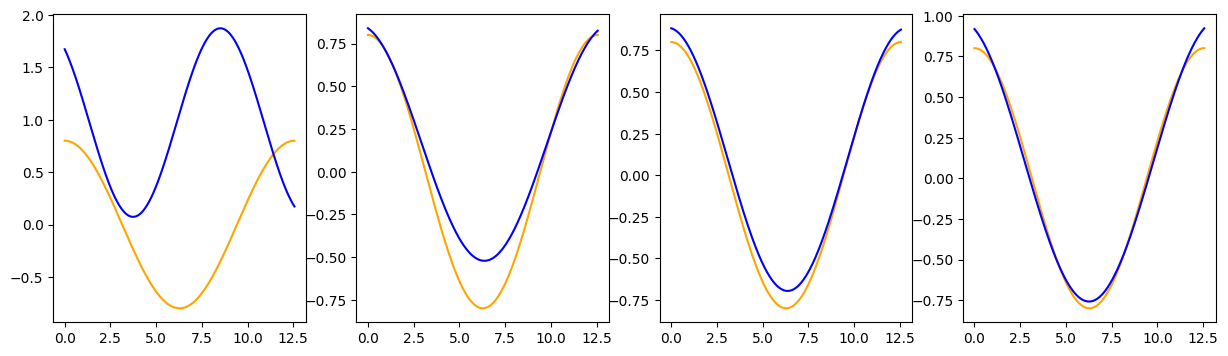

In [95]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,4,figsize=(15,4))
axs[0].plot(X,Y,"orange",label="datos originales")
axs[0].plot(X,prediccion(X,a0,b0,c0,d0),"blue",label="prediccion")
axs[1].plot(X,Y,"orange",label="datos originales")
axs[1].plot(X,prediccion(X,a1,b1,c1,d1),"blue",label="prediccion")
axs[2].plot(X,Y,"orange",label="datos originales")
axs[2].plot(X,prediccion(X,a2,b2,c2,d2),"blue",label="prediccion")
axs[3].plot(X,Y,"orange",label="datos originales")
axs[3].plot(X,prediccion(X,a3,b3,c3,d3),"blue",label="prediccion")

In [96]:
import math
X_1= np.arange(30 , 20*math.pi, 0.001).astype(np.float32)

In [97]:
prediccion(X_1,a3,b3,c3,d3)

array([ 0.473012  ,  0.4726638 ,  0.47231477, ..., -0.7581674 ,
       -0.7581564 , -0.75814545], dtype=float32)

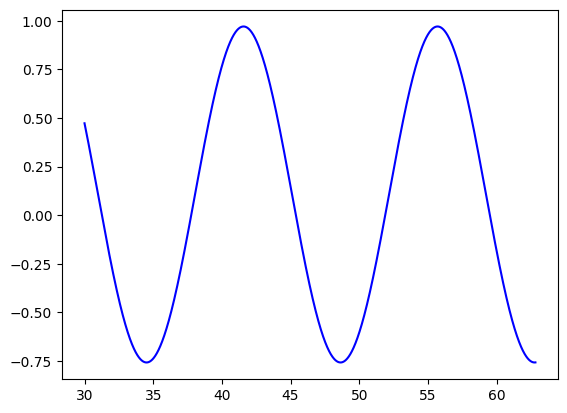

In [98]:
plt.plot(X_1,prediccion(X_1,a3,b3,c3,d3),"blue")

In [99]:
import sounddevice as sd

In [100]:
sd.play(prediccion(X_1,a3,b3,c3,d3))

In [176]:
def y_predict(a,b,c,d,x):
    return a * math.cos(b*x + c) + d

In [178]:
lr = 0.05
n = len(X)
batch = 100
epochs = 3000
rsl = []
a = random.random()
b = random.random()
c = random.random()
d = 0
for i in range(epochs):
    a_gradiente = 0
    b_gradiente = 0
    c_gradiente = 0
    d_gradiente = 0
    e = 0
    for m in range(batch):
        ix = int(random.uniform(0,n))
        e +=  (Y[ix] - y_predict(a,b,c,d,X[ix]))* (Y[ix] - y_predict(a,b,c,d,X[ix]))
        aux=2*(Y[ix]-(a*math.cos(b*X[ix]+c)+d))
        a_gradiente += aux*(-math.cos(b*X[ix]+c))
        b_gradiente += aux*(a*math.sin(b*X[ix]+c))*X[ix]
        c_gradiente += aux*(a*np.sin(b*X[ix]+c))

    a = a - lr * a_gradiente/batch
    b = b - lr * b_gradiente/batch
    c = c - lr * c_gradiente/batch

    e = e/batch
    rsl.append([a,b,c,d,e])
    print(f"error:{e} period:{b} amplitude:{a} constant: {c} ")

error:0.07311792924053317 period:0.3771232954087135 amplitude:0.8927819080385733 constant: 0.7887740381284303 
error:0.06763524922828096 period:0.4326891206482232 amplitude:0.8873592416885757 constant: 0.7876672508317192 
error:0.06470327719821402 period:0.37682289217155684 amplitude:0.8824319525057072 constant: 0.7742549724770917 
error:0.08244663951622808 period:0.4578013148666807 amplitude:0.8783310428444966 constant: 0.7746863679466512 
error:0.10356915760744041 period:0.36292215580804643 amplitude:0.8699215586802695 constant: 0.7559436358442326 
error:0.09799340029261681 period:0.4683862601685938 amplitude:0.8644639227383132 constant: 0.760226891566951 
error:0.12228249282156664 period:0.36690589785256356 amplitude:0.8559900731100317 constant: 0.7397024081634523 
error:0.09931826702685072 period:0.46662221097824425 amplitude:0.8515661286122154 constant: 0.742296998542306 
error:0.11083122225133588 period:0.3738618735732122 amplitude:0.8421780117240515 constant: 0.723511834926136 


In [179]:
rsl[-1]

[0.8000000146379757,
 0.49999999844806053,
 3.1409422808846832e-09,
 0,
 3.1608176633861134e-16]

In [180]:
ubicacion_1="D:/Machine/Tarea 4/test.csv"
df=pd.read_csv(ubicacion_1)

In [181]:
X_test=df["x"].values

In [183]:
TARGET=prediccion(X_test,rsl[-1][0],rsl[-1][1],rsl[-1][2],rsl[-1][3])

In [184]:
TARGET.shape

(50266,)

In [185]:
df["example_id"].shape

(50266,)

In [186]:
kaggle={"example_id":df["example_id"].values,"TARGET":TARGET}

In [187]:
kaggle_data=pd.DataFrame(kaggle)

In [188]:
kaggle_data.to_csv("D:/Machine/Tarea 4/kaggle.csv",index=False)